In [2]:
import nltk
import string
import pandas as pd
import numpy as np
import re
import string
from matplotlib import pyplot as plt
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from textstat.textstat import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
hate_df = pd.read_csv("C:\\Users\\User\\Desktop\\ITE-3962 project\\dataset\\Dataset1_labeled_data.csv")

In [4]:
hate_df

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you shouldn't...  
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
...                                                  ...  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[24783 rows x 7 columns]

In [84]:
hate_df['class'].value_counts() #count of tweets for each class labels

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Tweet distribution among 3 classes')

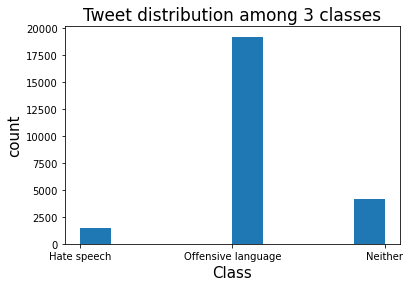

In [85]:
plt.hist(hate_df['class'], align='mid')
plt.ylabel('count', fontsize=15)
col_labels=['Hate speech', 'Offensive language', 'Neither']
x_values=np.arange(0, len(col_labels))
plt.xlabel('Class', fontsize=15)
plt.xticks(x_values, col_labels)
plt.title('Tweet distribution among 3 classes', fontsize=17)

We can see that the offensive class is highly populated compared to the other two classes. This can cause some bias towards the offensive class when later training the model.
One solution would be to balance the dataset using oversampling and undersampling.
I will try that in a later step of the process

# 2. Data Preprocessing 

First I will clean the tweets in the dataset. following operations will be performed in preprocessing step.
- tokenize
- remove stopwords
- stem
- remove URLs
- remove @mention tags
- remove punctutations
- remove numbers
- remove spaces
- lowercase


In [5]:
hate_df = hate_df.drop(columns=['Unnamed: 0'])

In [6]:
tweet=hate_df.tweet
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [7]:
#load stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
print(stop_words)#print the stopwords list

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words.remove("not")

In [9]:
stop_words.extend("rt")

In [10]:
stemmer = PorterStemmer()

def preprocess(tweet):
    
    #remove extra spaces
    regex_pattern = re.compile(r'\s+')
    tweet_space_removed = tweet.str.replace(regex_pattern, ' ')
    
    #remove mentions(@)
    regex_patten = re.compile(r'@[\w\-]+')
    tweets = tweet_space_removed.str.replace(regex_patten, '')
    
    #remove URLs
    url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets_new = tweets.str.replace(url_regex, '')
    
    #remove numbers and punctuations
    remove_punc_num = tweets_new.str.replace("[^a-zA-Z]", " ")
    
    #replace whitespaces with space
    newtweet = remove_punc_num.str.replace(r'\s+', ' ')
    
    #remove leading and trailing whitespaces
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    
    #lowercase
    tweets_lower = newtweet.str.lower()
    
    #tokenize
    tokenized_tweet = tweets_lower.apply(lambda x: x.split())
    
    #remove stop words
    tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])
    
    #stem the tweet
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        pre_tweets = tokenized_tweet
        
    return pre_tweets
    
preprocessed_tweets = preprocess(tweet)
    
hate_df['preprocessed_tweets'] = preprocessed_tweets
print(hate_df[["tweet","preprocessed_tweets"]].head(10))


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                 preprocessed_tweets  
0  rt woman complain clean hous amp man alway tak...  
1  rt boy dat cold tyga dwn bad cuffin dat hoe st...  
2   rt dawg rt ever fuck bitch start cri confus shit  
3                                rt look like tranni  
4  rt shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

# Feature Extraction

* Features are the variables that the machine learning algorithms use to train with. features are also known as independant variables.
* I planned to extract three different feature sets to be used to compare to find out which features are more useful
* 1. TF-IDF - Term Frequency- Inverse Document Frequency
* 2. Polarity scores by doing a sentiment analysis
* 3. FKRA and FRE scores with some additional featurs
***


# 1: tf-idf

* The term frequency-inverse document frequency vector is a method of determining the importance of a word or phrase. The presence of a unique word in a text may be determined using TF-IDF. This might be an important feature in recognizing the significance of various words in understanding specific different types of speech
* They are intended as weighting factors reflecting the importance of a word in a tweet among a collection of tweets.
* The term frequency represents the number of appearance of a word in a document, and the adjustment is made by the inverse document frequency. The inverse document frequency role is to give more weight to meaningful words, and reduce the weight of word not giving relevant information.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(hate_df['preprocessed_tweets'])

In [12]:
tfidf

<24783x6794 sparse matrix of type '<class 'numpy.float64'>'
	with 203497 stored elements in Compressed Sparse Row format>

In [13]:
print(tfidf)

  (0, 5899)	0.3895484939875555
  (0, 5185)	0.4144986349231078
  (0, 6172)	0.19246718350590478
  (0, 5886)	0.2435832297238816
  (0, 103)	0.25748371192925085
  (0, 3652)	0.22598841095809424
  (0, 124)	0.20746703102056352
  (0, 2906)	0.2935344050923211
  (0, 1197)	0.336083058427105
  (0, 1273)	0.34173224409911557
  (0, 6613)	0.3043869233998087
  (0, 4909)	0.10539761982292996
  (1, 1463)	0.3318876699404794
  (1, 4932)	0.336404015570907
  (1, 4441)	0.2755968294869668
  (1, 5691)	0.28194530204137186
  (1, 2725)	0.1143921832686951
  (1, 1395)	0.3540802182468746
  (1, 321)	0.19523151408628528
  (1, 6295)	0.3340830834194979
  (1, 1229)	0.28194530204137186
  (1, 1461)	0.4413283020640348
  (1, 896)	0.22472806570675913
  (1, 4909)	0.0910186615717789
  (2, 727)	0.3390168249843799
  :	:
  (24780, 966)	0.343011332843257
  (24780, 63)	0.37409643142606824
  (24780, 4110)	0.26604418498734955
  (24780, 1552)	0.2613777761879398
  (24780, 2196)	0.2280990649157048
  (24780, 1720)	0.21384505532921141
  (2478

In [14]:
tfidf_a = tfidf.toarray()

In [15]:
tfidf_a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 2: Polarity Scores using sentiment  Analysis

* Text classification extends beyond simple analytical processing. It is critical to understand the sentiment underlying the message; else, its real meaning will most likely be misunderstood and/or misinterpreted. Vader sentiment of NLTK will be used to capture polarity scores (positive, negative, and neutral) of each sentence to be used as a set of features for ML algorithms

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sentiment_analyzer=VS()

def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features=sentiment_analysis_array(tweet)

new_features = pd.DataFrame({'Neg':sentiment_features[:,0], 'Pos':sentiment_features[:,1], 'Neu':sentiment_features[:,2], 'compound':sentiment_features[:,3]})
new_features

Neg    Pos    Neu  compound
0      0.000  0.120  0.880    0.4563
1      0.237  0.000  0.763   -0.6876
2      0.538  0.000  0.462   -0.9550
3      0.000  0.344  0.656    0.5673
4      0.249  0.081  0.669   -0.7762
...      ...    ...    ...       ...
24778  0.000  0.000  1.000    0.0000
24779  0.454  0.000  0.546   -0.8074
24780  0.000  0.219  0.781    0.4738
24781  0.573  0.000  0.427   -0.7717
24782  0.000  0.218  0.782    0.5994

[24783 rows x 4 columns]

## 3: some additional features

I decided to use Flesh kincaid grade level(*FKGL*) and flesh Reading ease(*FRE*) score as 2 of the additional features.

* flesh readability formulas were developed by *rudolf flesh* in 1940. these scores are used to assess the readability of a text
* *FRE* gives a text a score between 1-100 with 100 being the highest readability score. this method is used by marketers, research communicators etc.All use it to help them assess the ease by which a piece of text will be understood and engaged with.

* *FKGL* is a widely used readability formula which assesses the approximate reading grade level of a text. f a text has a Flesch Kincaid level of 8, this means the reader needs a grade 8 level of reading or above to understand it. Even if they’re an advanced reader, it means the content is less time-consuming to read. 

to use these formulas, we have to find below featurs:
* syllables - total number of syllables per tweet
* average syllables - total syllables/total words
* number of characters - sum of number of characters in a tweet
* total characters - length of a tweet
* number of words - number of words in a tweet
* number of unique words

In [18]:
from textstat.textstat import textstat

In [19]:
def additional_features(tweet):
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    #Modified FKRA grade, where average words per sentence is : number of words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    addit_features = [FKRA, FRE, syllables, avg_syl, num_chars, num_chars_total, num_words, num_unique_terms]
    return addit_features

def get_additional_features_array(tweets):
    features = []
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

addifeatures = get_additional_features_array(preprocessed_tweets)

df_addifeatures = pd.DataFrame(addifeatures)
df_addifeatures

0       1     2       3     4     5     6     7
0      3.7   86.71  13.0  1.3000  53.0  53.0  10.0  10.0
1      2.9   95.95  14.0  1.1667  52.0  52.0  12.0  11.0
2      2.5   95.17  12.0  1.2000  48.0  48.0  10.0   9.0
3      0.7   97.03   5.0  1.2499  19.0  19.0   4.0   4.0
4      1.3  103.62  11.0  1.1000  49.0  49.0  10.0   9.0
...    ...     ...   ...     ...   ...   ...   ...   ...
24778  1.0  103.70  10.0  1.1111  49.0  49.0   9.0   9.0
24779  0.8  103.54   9.0  1.1250  47.0  47.0   8.0   8.0
24780  2.5   95.17  12.0  1.2000  51.0  51.0  10.0  10.0
24781 -1.4  116.15   6.0  1.0000  30.0  30.0   6.0   6.0
24782  5.8   76.50  18.0  1.3846  77.0  77.0  13.0  13.0

[24783 rows x 8 columns]

In [20]:
from wordcloud import WordCloud
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
from gensim.test.utils import common_texts
import seaborn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix

# Finding which feature sets perform the best with selected machine learning algorithms

I compared different combinations of selected 3 feature sets with tf-idf as the main features, with 6 machine learning algorithms:
* Logistic Regression
* Random forest
* Linear SVC of SVM
* K neighbours classifier
* Naive Bayes
* The Gradient Descent

The purpose was to find out which features work best with which algorithm. Therefore I can continue with that to further optimization

# compare models with tf-idf features only

## 1: Logistic regression

In [107]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated 
# and the train and test datasets would have different values each time.
X = tfidf
y = hate_df['class'].astype(int)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_lr = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model_lr.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)


              precision    recall  f1-score   support

           0       0.56      0.17      0.26       290
           1       0.91      0.96      0.94      3832
           2       0.85      0.84      0.85       835

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957

Logistic Regression, Accuracy Score: 0.8975186604801291


## 2: Random Forest

In [108]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_rf = RandomForestClassifier().fit(X_train_tfidf,y_train)
y_preds = model_rf.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc2=accuracy_score(y_test,y_preds)
print("Random Forest, Accuracy Score:" , acc2)

              precision    recall  f1-score   support

           0       0.50      0.18      0.26       290
           1       0.93      0.96      0.94      3832
           2       0.84      0.91      0.87       835

    accuracy                           0.90      4957
   macro avg       0.76      0.68      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Random Forest, Accuracy Score: 0.9049828525317732


## 3: Linear SVC

In [109]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_lsvc = LinearSVC().fit(X_train_tfidf,y_train)
y_preds = model_lsvc.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc3=accuracy_score(y_test,y_preds)
print("Linear SVC, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.48      0.27      0.34       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.75      0.69      0.71      4957
weighted avg       0.88      0.89      0.89      4957

Linear SVC, Accuracy Score: 0.8940891668347791


## 3: K neighbours classifier

In [110]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_kn = KNeighborsClassifier().fit(X_train_tfidf,y_train)
y_preds = model_kn.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc4=accuracy_score(y_test,y_preds)
print("K neighbours classifier, Accuracy Score:" , acc4)

              precision    recall  f1-score   support

           0       0.46      0.14      0.22       290
           1       0.93      0.34      0.49      3832
           2       0.22      0.92      0.36       835

    accuracy                           0.42      4957
   macro avg       0.53      0.47      0.36      4957
weighted avg       0.78      0.42      0.46      4957

K neighbours classifier, Accuracy Score: 0.4242485374218277


## 5: Naive bayes 

In [111]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)#used X.toarray() instead of X
model_nb = GaussianNB().fit(X_train_tfidf,y_train)
y_preds = model_nb.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc5=accuracy_score(y_test,y_preds)
print("Naive bayes, Accuracy Score:" , acc5)

              precision    recall  f1-score   support

           0       0.10      0.38      0.16       290
           1       0.89      0.70      0.78      3832
           2       0.56      0.60      0.58       835

    accuracy                           0.66      4957
   macro avg       0.52      0.56      0.51      4957
weighted avg       0.79      0.66      0.71      4957

Naive bayes, Accuracy Score: 0.6641113576760137


## 6: the gradient descent

In [112]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_sdgc = SGDClassifier().fit(X_train_tfidf,y_train)
y_preds = model_sdgc.predict(X_test_tfidf)

report = classification_report( y_test, y_preds )
print(report)
acc6=accuracy_score(y_test,y_preds)
print("K neighbours classifier, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.60      0.18      0.28       290
           1       0.93      0.96      0.94      3832
           2       0.82      0.89      0.85       835

    accuracy                           0.90      4957
   macro avg       0.78      0.68      0.69      4957
weighted avg       0.89      0.90      0.89      4957

K neighbours classifier, Accuracy Score: 0.9011498890457939


### Comparisson of the algorithm accuracies with tf-idf features

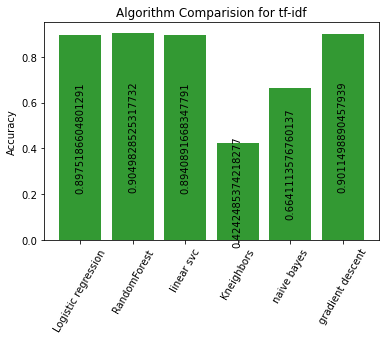

In [113]:
objects = ('Logistic regression', 'RandomForest', 'linear svc', 'Kneighbors', 'naive bayes', 'gradient descent')
algorithm = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]
barplot = plt.bar(algorithm, performance, align='center', alpha=0.8, color='green')
plt.bar_label(barplot, labels=performance, label_type="center", rotation=90)
plt.xticks(algorithm, objects, rotation=60)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for tf-idf')
plt.show()

# compare models with tf-idf & Polarity scores combined

In [114]:
tfidf_senti = np.concatenate([tfidf_a,sentiment_features],axis=1)

In [115]:
tfidf_senti

array([[ 0.    ,  0.    ,  0.    , ...,  0.12  ,  0.88  ,  0.4563],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.763 , -0.6876],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.462 , -0.955 ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.219 ,  0.781 ,  0.4738],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.427 , -0.7717],
       [ 0.    ,  0.    ,  0.    , ...,  0.218 ,  0.782 ,  0.5994]])

## 1: logistic regression

In [116]:
X = pd.DataFrame(tfidf_senti)
y = hate_df['class'].astype(int)
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [117]:
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_lr = LogisticRegression().fit(X_train_tfsenti,y_train)
y_preds = model_lr.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)

              precision    recall  f1-score   support

           0       0.57      0.18      0.27       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.90      4957
   macro avg       0.78      0.66      0.69      4957
weighted avg       0.88      0.90      0.89      4957

Logistic Regression, Accuracy Score: 0.8985273350817027


## 2: Random Forest

In [118]:
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_rf = RandomForestClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_rf.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc2 = accuracy_score(y_test,y_preds)
print("Random forest, Accuracy Score:" , acc2)

              precision    recall  f1-score   support

           0       0.53      0.13      0.21       290
           1       0.91      0.96      0.94      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.90      4957
   macro avg       0.76      0.65      0.67      4957
weighted avg       0.88      0.90      0.88      4957

Random forest, Accuracy Score: 0.896913455719185


## 3: Linear SVC

In [119]:
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_lsvc = LinearSVC().fit(X_train_tfsenti,y_train)
y_preds = model_lsvc.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc3 = accuracy_score(y_test,y_preds)
print("Linear SVC, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.69      0.70      4957
weighted avg       0.88      0.89      0.89      4957

Linear SVC, Accuracy Score: 0.8926770223925762


## 4: K neighbors

In [120]:
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_kn = KNeighborsClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_kn.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc4 = accuracy_score(y_test,y_preds)
print("K neighbors, Accuracy Score:" , acc4)

              precision    recall  f1-score   support

           0       0.51      0.19      0.28       290
           1       0.92      0.71      0.80      3832
           2       0.38      0.86      0.53       835

    accuracy                           0.70      4957
   macro avg       0.60      0.59      0.54      4957
weighted avg       0.80      0.70      0.72      4957

K neighbors, Accuracy Score: 0.7046600766592698


## 5: naive bayes

In [122]:
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_nb = GaussianNB().fit(X_train_tfsenti,y_train)
y_preds = model_nb.predict(X_test_tfsenti)
report = classification_report( y_test, y_preds )
print(report)
acc5 = accuracy_score(y_test,y_preds)
print("Naive bayes, Accuracy Score:" , acc5)

              precision    recall  f1-score   support

           0       0.10      0.38      0.16       290
           1       0.89      0.70      0.78      3832
           2       0.56      0.60      0.58       835

    accuracy                           0.66      4957
   macro avg       0.52      0.56      0.51      4957
weighted avg       0.79      0.66      0.71      4957

Naive bayes, Accuracy Score: 0.6643130925963284


## 6: gradient descent

In [123]:
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_sgdc = SGDClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_sgdc.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc6 = accuracy_score(y_test,y_preds)
print("the gradient descent, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.60      0.19      0.29       290
           1       0.93      0.96      0.94      3832
           2       0.82      0.91      0.87       835

    accuracy                           0.90      4957
   macro avg       0.78      0.69      0.70      4957
weighted avg       0.89      0.90      0.89      4957

the gradient descent, Accuracy Score: 0.9047811176114585


### Accuracy Comparisson of the above different algorithms

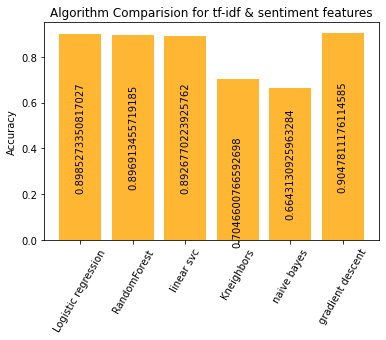

In [124]:
objects1 = ('Logistic regression', 'RandomForest', 'linear svc', 'Kneighbors', 'naive bayes', 'gradient descent')
algorithm = np.arange(len(objects1))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]
plt.bar(algorithm, performance, align='center', alpha=0.8, color='orange')
plt.bar_label(barplot, labels=performance, label_type="center", rotation=90)
plt.xticks(algorithm, objects1, rotation=60)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for tf-idf & sentiment features')
plt.show()

# compare models with tf-idf, sentiment & additional features combined

In [125]:
tfidf_senti_addi = np.concatenate([tfidf_a,sentiment_features,addifeatures],axis=1)
tfidf_senti_addi

array([[ 0.,  0.,  0., ..., 53., 10., 10.],
       [ 0.,  0.,  0., ..., 52., 12., 11.],
       [ 0.,  0.,  0., ..., 48., 10.,  9.],
       ...,
       [ 0.,  0.,  0., ..., 51., 10., 10.],
       [ 0.,  0.,  0., ..., 30.,  6.,  6.],
       [ 0.,  0.,  0., ..., 77., 13., 13.]])

In [126]:
X = pd.DataFrame(tfidf_senti_addi)
y = hate_df['class'].astype(int)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## 1- logistic regression

In [127]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_lr =  LogisticRegression().fit(X_train_all,y_train)
y_preds = model_lr.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc1=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.83      0.96      0.89      3832
           2       0.64      0.39      0.49       835

    accuracy                           0.81      4957
   macro avg       0.49      0.45      0.46      4957
weighted avg       0.75      0.81      0.77      4957

Logistic Regression, Accuracy Score: 0.8079483558603995


## 2- random forest

In [128]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_rf = RandomForestClassifier().fit(X_train_all,y_train)
y_preds = model_rf.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc2 = accuracy_score(y_test,y_preds)
print("Random Forest, Accuracy Score:" , acc2)

              precision    recall  f1-score   support

           0       0.42      0.07      0.12       290
           1       0.89      0.97      0.93      3832
           2       0.86      0.75      0.80       835

    accuracy                           0.88      4957
   macro avg       0.72      0.60      0.62      4957
weighted avg       0.86      0.88      0.86      4957

Random Forest, Accuracy Score: 0.8823885414565261


## 3- Linear SVC

In [129]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_lsvc = LinearSVC().fit(X_train_all,y_train)
y_preds = model_lsvc.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc3 = accuracy_score(y_test,y_preds)
print("Linear SVC, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.48      0.43      0.45       290
           1       0.95      0.92      0.93      3832
           2       0.77      0.93      0.84       835

    accuracy                           0.89      4957
   macro avg       0.73      0.76      0.74      4957
weighted avg       0.89      0.89      0.89      4957

Linear SVC, Accuracy Score: 0.8904579382691143


## 4- K neighbours classifier

In [130]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_kn = KNeighborsClassifier().fit(X_train_all,y_train)
y_preds = model_kn.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc4 = accuracy_score(y_test,y_preds)
print("K neighbours classifier, Accuracy Score:" , acc4)

              precision    recall  f1-score   support

           0       0.15      0.05      0.07       290
           1       0.81      0.93      0.87      3832
           2       0.49      0.26      0.34       835

    accuracy                           0.77      4957
   macro avg       0.48      0.41      0.43      4957
weighted avg       0.72      0.77      0.73      4957

K neighbours classifier, Accuracy Score: 0.7680048416380876


## 5- Naive Bayes

In [131]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_nb = GaussianNB().fit(X_train_all,y_train)
y_preds = model_nb.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc5 = accuracy_score(y_test,y_preds)
print("Naive bayes, Accuracy Score:" , acc5)

              precision    recall  f1-score   support

           0       0.11      0.38      0.17       290
           1       0.89      0.70      0.79      3832
           2       0.56      0.61      0.58       835

    accuracy                           0.67      4957
   macro avg       0.52      0.56      0.51      4957
weighted avg       0.79      0.67      0.71      4957

Naive bayes, Accuracy Score: 0.6677425862416785


## 6- gradient descent

In [132]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model_sgdc = SGDClassifier().fit(X_train_all,y_train)
y_preds = model_sgdc.predict(X_test_all)

report = classification_report( y_test, y_preds )
print(report)
acc6 = accuracy_score(y_test,y_preds)
print("gradient descent, Accuracy Score:" , acc6)

              precision    recall  f1-score   support

           0       0.26      0.03      0.06       290
           1       0.89      0.95      0.91      3832
           2       0.72      0.71      0.72       835

    accuracy                           0.85      4957
   macro avg       0.62      0.56      0.56      4957
weighted avg       0.82      0.85      0.83      4957

gradient descent, Accuracy Score: 0.8537421827718378


### compare accuracies for above alogorthms with all features

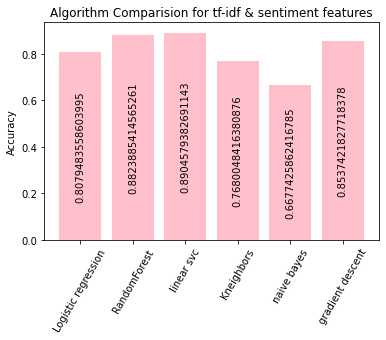

In [133]:
fig, ax = plt.subplots()
objects2 = ('Logistic regression', 'RandomForest', 'linear svc', 'Kneighbors', 'naive bayes', 'gradient descent')
algorithm = np.arange(len(objects2))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]
barplot = plt.bar(algorithm, performance, align='center', alpha=1, color='pink')
plt.bar_label(barplot, labels=performance, label_type="center", rotation=90)
plt.xticks(algorithm, objects2, rotation=60)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for tf-idf & sentiment features')
plt.show()

# undersampling and oversampling to overcome imbalanced classes issue


In [47]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [48]:
#Undersampling
#undersampling resamples the dataset so that majority class will be reduced to match the minority class
#only used tfidf and polarity features
X = pd.DataFrame(tfidf_senti)
y = hate_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
und_sampler = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = und_sampler.fit_resample(X_train, y_train)

In [49]:
y_undersampled.value_counts()

0    1140
1    1140
2    1140
Name: class, dtype: int64

In [50]:
#oversampling
#oversampling resamples the dataset so that minority class will be increased to match the majority class
over_sampler = SMOTE("minority", random_state=42)
X_oversampled, y_oversampled = over_sampler.fit_resample(X_train, y_train)

In [51]:
y_oversampled.value_counts()

0    15358
1    15358
2     3328
Name: class, dtype: int64

## comparing random forest algorithm with undersamples, oversampled and original datatsets using tfidf and polarity features

### original 

In [52]:
X = pd.DataFrame(tfidf_senti)
y = hate_df['class'].astype(int)
X_train_tfsenti, X_test_tfsenti, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model_rf = RandomForestClassifier().fit(X_train_tfsenti,y_train)
y_preds = model_rf.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_ori = accuracy_score(y_test,y_preds)
print("Random forest, Accuracy Score:" , acc_ori)

              precision    recall  f1-score   support

           0       0.49      0.13      0.20       290
           1       0.91      0.97      0.94      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.90      4957
   macro avg       0.75      0.65      0.66      4957
weighted avg       0.88      0.90      0.88      4957

Random forest, Accuracy Score: 0.8977203954004438


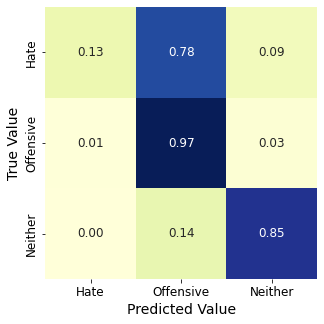

In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

### undersampled

In [54]:
model_rfu = RandomForestClassifier().fit(X_undersampled, y_undersampled)
y_preds = model_rfu.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_under = accuracy_score(y_test,y_preds)
print("Random forest with undersampled, Accuracy Score:" , acc_under)

              precision    recall  f1-score   support

           0       0.24      0.68      0.35       290
           1       0.98      0.79      0.87      3832
           2       0.75      0.92      0.82       835

    accuracy                           0.81      4957
   macro avg       0.65      0.79      0.68      4957
weighted avg       0.90      0.81      0.84      4957

Random forest with undersampled, Accuracy Score: 0.8059310066572524


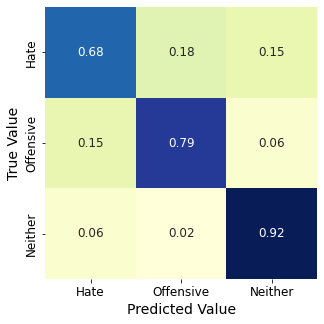

In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

### oversampled

In [56]:
model_rfo = RandomForestClassifier().fit(X_oversampled, y_oversampled)
y_preds = model_rfo.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_over = accuracy_score(y_test,y_preds)
print("Random forest with oversampled, Accuracy Score:" , acc_over)

              precision    recall  f1-score   support

           0       0.44      0.37      0.40       290
           1       0.92      0.95      0.93      3832
           2       0.86      0.80      0.83       835

    accuracy                           0.89      4957
   macro avg       0.74      0.71      0.72      4957
weighted avg       0.88      0.89      0.89      4957

Random forest with oversampled, Accuracy Score: 0.8882388541456526


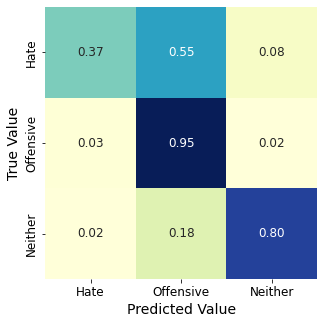

In [57]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

# Grid Search

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## tuning random forest classifier hyperparameters with undersampled dataset

In [59]:
tuned_rf = RandomForestClassifier()

#parameter grid for randomForest
para_grid = {
    'min_samples_split': [1, 2, 3, 10],
    'n_estimators': [80, 100, 300, 1000],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

#cross validation
cv = StratifiedKFold(n_splits=3, random_state=20, shuffle=True)

scorers = {
    'precision_score': make_scorer(precision_score, average = 'micro') ,
    'recall_score': make_scorer(recall_score, average = 'micro') ,
    'accuracy_score': make_scorer(accuracy_score) ,
    'f1_score': make_scorer(f1_score, average = 'micro')
}

In [60]:
def grid_search(refit_score='precision_score'):
    
    best_clf = GridSearchCV(tuned_rf, para_grid, scoring=scorers, refit=refit_score,
                           cv=cv, return_train_score=True, verbose=1)
    
    best_clf.fit(X_undersampled, y_undersampled)
    
    #get the predictions
    y_pred = best_clf.predict(X_test_tfsenti)
    
    print('Best parameters for {}'.format(refit_score))
    print(best_clf.best_params_)
    
    return best_clf

In [62]:
import warnings 
warnings.filterwarnings("ignore")
grid_search = grid_search(refit_score='precision_score') 

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for precision_score
{'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 1, 'n_estimators': 1000}


In [63]:
#get the final model by implementing the parameters given above by grid search
final_model = RandomForestClassifier(max_features = 'auto', min_samples_leaf=3, min_samples_split=1, n_estimators=1000 )
final_model.fit(X_undersampled, y_undersampled)

RandomForestClassifier(max_features='auto', min_samples_leaf=3,
                       min_samples_split=1, n_estimators=1000)

### evaluate the final model

In [64]:
y_preds = final_model.predict(X_test_tfsenti)

report = classification_report( y_test, y_preds )
print(report)
acc_final = accuracy_score(y_test,y_preds)
print("Accuracy Score:" , acc_final)

              precision    recall  f1-score   support

           0       0.28      0.66      0.39       290
           1       0.98      0.81      0.89      3832
           2       0.71      0.92      0.80       835

    accuracy                           0.82      4957
   macro avg       0.66      0.80      0.69      4957
weighted avg       0.89      0.82      0.84      4957

Accuracy Score: 0.8228767399636877


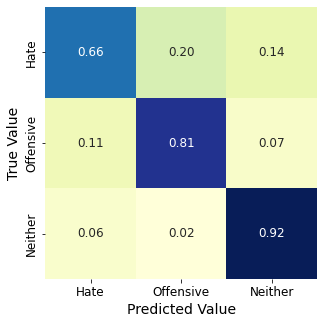

In [65]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

# preparing the model to deploy on to the web application

To make our model operational for the application we first need to create functions for all the preparative steps the user's input text will go through to give a prediction. Then the model will be able to translate wether his input is hate speech, offensive language, or neither of them.

These preparative functions involve:

the preprocessing of the tweets (removal of punctuation & special characters, stemming, tokenization,...)
the creation of the final features used for classification: the TF-IDF array, the sentiment analysis, and the additional textual features
Finally we define a get_predictions function that will get the input text to funnel through the previous functions and lead to the prediction.

In [66]:
stopwords = nltk.corpus.stopwords.words("english")
exclusions = ["#ff", "ff", "rt"]
stopwords.extend(exclusions)
stopwords.remove("not")
stemmer = PorterStemmer()

def preprocess(tweet):
    
    #remove extra spaces
    regex_pattern = re.compile(r'\s+')
    tweet_space_removed = tweet.str.replace(regex_pattern, ' ')
    
    #remove mentions(@)
    regex_patten = re.compile(r'@[\w\-]+')
    tweets = tweet_space_removed.str.replace(regex_patten, '')
    
    #remove URLs
    url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets_new = tweets.str.replace(url_regex, '')
    
    #remove numbers and punctuations
    remove_punc_num = tweets_new.str.replace("[^a-zA-Z]", " ")
    
    #replace whitespaces with space
    newtweet = remove_punc_num.str.replace(r'\s+', ' ')
    
    #remove leading and trailing whitespaces
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    
    #lowercase
    tweets_lower = newtweet.str.lower()
    
    #tokenize
    tokenized_tweet = tweets_lower.apply(lambda x: x.split())
    
    #remove stop words
    tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])
    
    #stem the tweet
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_pre = tokenized_tweet
        
    return tweets_pre


In [67]:
def tfidf_featurs(tweet):
    tweet = pd.Series(tweet)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
    tfidf_vectorizer.fit_transform(hate_df['preprocessed_tweets'])
    tfidf_string = tfidf_vectorizer.transform(tweet)
    tfidf_array = tfidf_string.toarray()
    return tfidf_array

In [68]:
sentiment_analyzer=VS()

def sentiment_analysis_string(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
def get_predictions(tweet):
    
    #convert the input string to a panda series
    tweet = pd.Series(tweet)
    
    #Get the sentiment analysis of the un-preprocessed string
    #we need to apply this function when the string is not yet pre processed in order to keep the whole meaning
    #of the sentence
    polarity_scores = sentiment_analysis_array(tweet)
    
    #preprocess the input string
    preprocessed_string = preprocess(tweet)
    
    #convert input string to a vector array
    array_tfidf = tfidf_featurs(tweet)
    
    #concatenate all the features
    final_features = np.concatenate([array_tfidf, polarity_scores], axis=1)
    
    #transform features array to a dataframe
    final_df = pd.DataFrame(final_features)
    
    #apply final model to the input string
    prediction = final_model.predict(final_df)
    
    if prediction == 0:
        return "Hate speech"
    elif prediction == 1:
        return "Offensive Language"
    elif prediction == 2:
        return "neither"
    else:
        return "no label"
    return prediction

In [71]:
tweet_test = "black people are rude and stupid"
get_predictions(tweet_test)

'Hate speech'

In [72]:
tweet_test_2 = "you don't deserive this shit"
get_predictions(tweet_test_2)

'Offensive Language'

In [73]:
tweet_test_3 = "I’m glad you are alive but you so easily could have died and it would solely be your fault."
get_predictions(tweet_test_3)

'Hate speech'

In [74]:
tweet_test_4 = "Have you heard the term “you get what you pay for”? All your troubles can be resolved, simply by purchasing a business class ticket or better yet a first class seat and forever quit your complaining. Maybe use all those air miles you’ve racked up to upgrade from economy next time. You lack a ton of common sense and have publicly embarrassed yourself with these whiny comments."
get_predictions(tweet_test_4)

'neither'

In [75]:
tweet_test_5 = "you do a pretty good job of being a total douche!"
get_predictions(tweet_test_5)

'neither'

In [82]:
tweet_test_6 = "You post shit content"
get_predictions(tweet_test_6)

'Offensive Language'

In [77]:
tweet_test_7 = "stfu faggot"
get_predictions(tweet_test_7)

'Hate speech'

In [78]:
tweet_test_8 = "man you so fucking nice"
get_predictions(tweet_test_8)

'neither'

In [79]:
tweet_test_9 = "asians are dumb and they lacks physical strength"
get_predictions(tweet_test_9)

'Hate speech'

In [83]:
import pickle
filename = 'final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))